
# Project: Investigating a Dataset of Medical Appointments in Brazil

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


<a id='intro'></a>
## Introduction

<br> In this project We are going through a dataset provided by kaggle for over 100,000 medical appointments in Brazil.
<br> The dataset lists various information such as: patients' ID, age, sex, scheduled day, appointment day, patient's disease, hospital location, whether the patient showed or not, etc.

<br> The project will go through the relevant steps in the data analysis process and invesigates various questions such as:
<br>  1.	What is the Disribution of Now Shows Over The Given Annual Quarter?
<br>  2.	Which neighbourhood had the most no-shows ?
<br>  3.	Which neighbourhood had the highest percentage of no-shows ?
<br>  4.	Which Gender had the highest number of no-shows ?
<br>  5.	Which Gender was more probable to not show and skip appointments?
<br>  6.	What percent of no shows were enrolled into the healthcare program?
<br>  7.    What is the effect of SMS reminders on the showing rate ?

### First we will import the packages that we are going to use

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

In this section of the report we are going to load the data and clean it if necessary

### General Properties

In [2]:
# Loading the data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
print(df.shape)
df.head()

(110527, 14)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


We can see that the minimum age is -1 which we will investigate and delete later 
<br> we also see that a small percentage of the sample was enrolled in the healthcare program which is less than 25% because even the third quartile q3 = 0
<br> and only a small percentage of the patients received SMS reminders which is shown by the third quartile where q3 = 1 which  

In [4]:
# We will check the data types in each columns and change it if not suitable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


We will need to change the data type of the shceduled day and appointment day to the suitable data type to use it in our analysis

### Data Cleaning
In this step we will be cleaning the data by removing unnecessary columns and/or rows.
<br> We may fill missing values or delete them entirely.

Our data has 110,527 rows and 14 columns
<br> - We have an unused columns which we will remove from the dataset.
<br> - We appear to have no missing values in any columns
<br> - We will create new columns if needed

First, we will rename the column names for ease of use in the analysis

In [5]:
# We will rename the columns to easier labels and make them lower case
df.rename(columns=lambda x: x.lower(), inplace=True)
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [6]:
# We will rename the no-show column to remove the dash and replace it with an underscore
df.rename(columns = {'no-show':'no_show'}, inplace=True)
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


before doing further work it'd be better to drop the unwanted columns 

In [7]:
# Removing unwanted columns which are
# appointmentid, scheduledday, hipertension, diabetes, alcoholism, handcap, and sms_received
# We will create an array with the indices of the columns using Numpy 'r_' because the indices are not in a series

drop_columns = np.r_[1,3, np.arange(8,12)]
drop_columns

array([ 1,  3,  8,  9, 10, 11])

In [8]:
# And now we drop the unwanted columns
df.drop(df.iloc[:,drop_columns] , axis = 1, inplace = True)
df.head()

,patientid,gender,appointmentday,age,neighbourhood,scholarship,sms_received,no_show
0,2.987250e+13,F,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,0,No
1,5.589978e+14,M,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,No
2,4.262962e+12,F,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,No
3,8.679512e+11,F,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,No
4,8.841186e+12,F,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,No


then we should change the data type of the appointmentday columns

In [9]:
#We will need to change the data type of appointment day to the suitable data type
#We will not rename the appointment id because we will later drop that column in total
df['appointmentday'] = pd.to_datetime(df['appointmentday'])

#We will check the conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   patientid       110527 non-null  float64            
 1   gender          110527 non-null  object             
 2   appointmentday  110527 non-null  datetime64[ns, UTC]
 3   age             110527 non-null  int64              
 4   neighbourhood   110527 non-null  object             
 5   scholarship     110527 non-null  int64              
 6   sms_received    110527 non-null  int64              
 7   no_show         110527 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(3)
memory usage: 6.7+ MB


In [10]:
# Checking that our data is complete
df.isnull().sum()

patientid         0
gender            0
appointmentday    0
age               0
neighbourhood     0
scholarship       0
sms_received      0
no_show           0
dtype: int64

In [11]:
# Checking that we don't have wrong entries in our data 
# We will look at the age column
df.groupby('gender').describe().age

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,71840.0,38.893987,22.155235,-1.0,21.0,39.0,56.0,115.0
M,38687.0,33.736863,24.435221,0.0,10.0,33.0,54.0,100.0


We see that there are rows with the age = -1 which we will delete because they represent a wrong entry

In [12]:
# first we will find the index of the wrong entries
wrong_values = df[df['age'] == -1]

In [13]:
# then we delete them
df.drop(wrong_values.index, axis = 0, inplace=True)

In [14]:
# finally we check our dataset again

In [15]:
df.groupby('gender').describe().age

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,71839.0,38.894542,22.154889,0.0,21.0,39.0,56.0,115.0
M,38687.0,33.736863,24.435221,0.0,10.0,33.0,54.0,100.0


we should check duplicates and drop them as well

In [16]:
df.duplicated().sum()

5155

In [17]:
df.drop_duplicates(inplace = True)
df.shape

(105371, 8)

and now we will create a new column to use in our analysis

In [18]:
# Creating a new column for the month variable
df['month'] = df.appointmentday.dt.month
df.head()

,patientid,gender,appointmentday,age,neighbourhood,scholarship,sms_received,no_show,month
0,2.987250e+13,F,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,0,No,4
1,5.589978e+14,M,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,No,4
2,4.262962e+12,F,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,No,4
3,8.679512e+11,F,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,No,4
4,8.841186e+12,F,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,No,4


We will now create 2 datasets to use in our analysis: one for no-shows and the other for those who showed for their appointment

In [19]:
#Creating a data frame for those who did not show 
df_NS = df.query('no_show == "Yes"')

# Creating a data frame for those who showed
df_S = df.query('no_show == "No"')

In [20]:
print(df_NS.shape)
print(df_S.shape)
print(df.shape)

(21606, 9)
(83765, 9)
(105371, 9)


<a id='eda'></a>
## Exploratory Data Analysis

As we have prepared and cleaned the data, then we can move on with our data analysis.
<br> the dataframe we are working with after cleaning and manipulating the data has 105,371 rows and 9 columns
<br> We will ask various questions and explain their answers in the cells below using statistical measures and showing visuals. 



### Research Question 1: What is the Disribution of Now Shows Over The Given Annual Quarter?

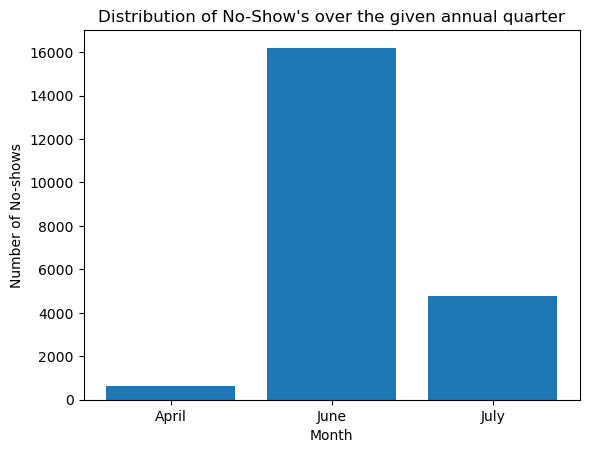

In [21]:
y = df_NS.groupby('month').no_show.value_counts()
x = ['April', 'June', 'July']
plt.bar(x, y)
plt.title("Distribution of No-Show's over the given annual quarter")
plt.xlabel("Month")
plt.ylabel("Number of No-shows")
plt.show()


In [22]:
total_no_shows = df_NS.shape[0]
june_no_shows = df_NS.groupby('month').no_show.value_counts().max()
print (total_no_shows)  
print (june_no_shows) 
print( june_no_shows / total_no_shows)

21606
16203
0.7499305748403221


We can see that June was the number with the most no shows in our dataframe and that the plot is right-skewed.

### Research Question 2 : Which neighbourhood had the most no-shows ?

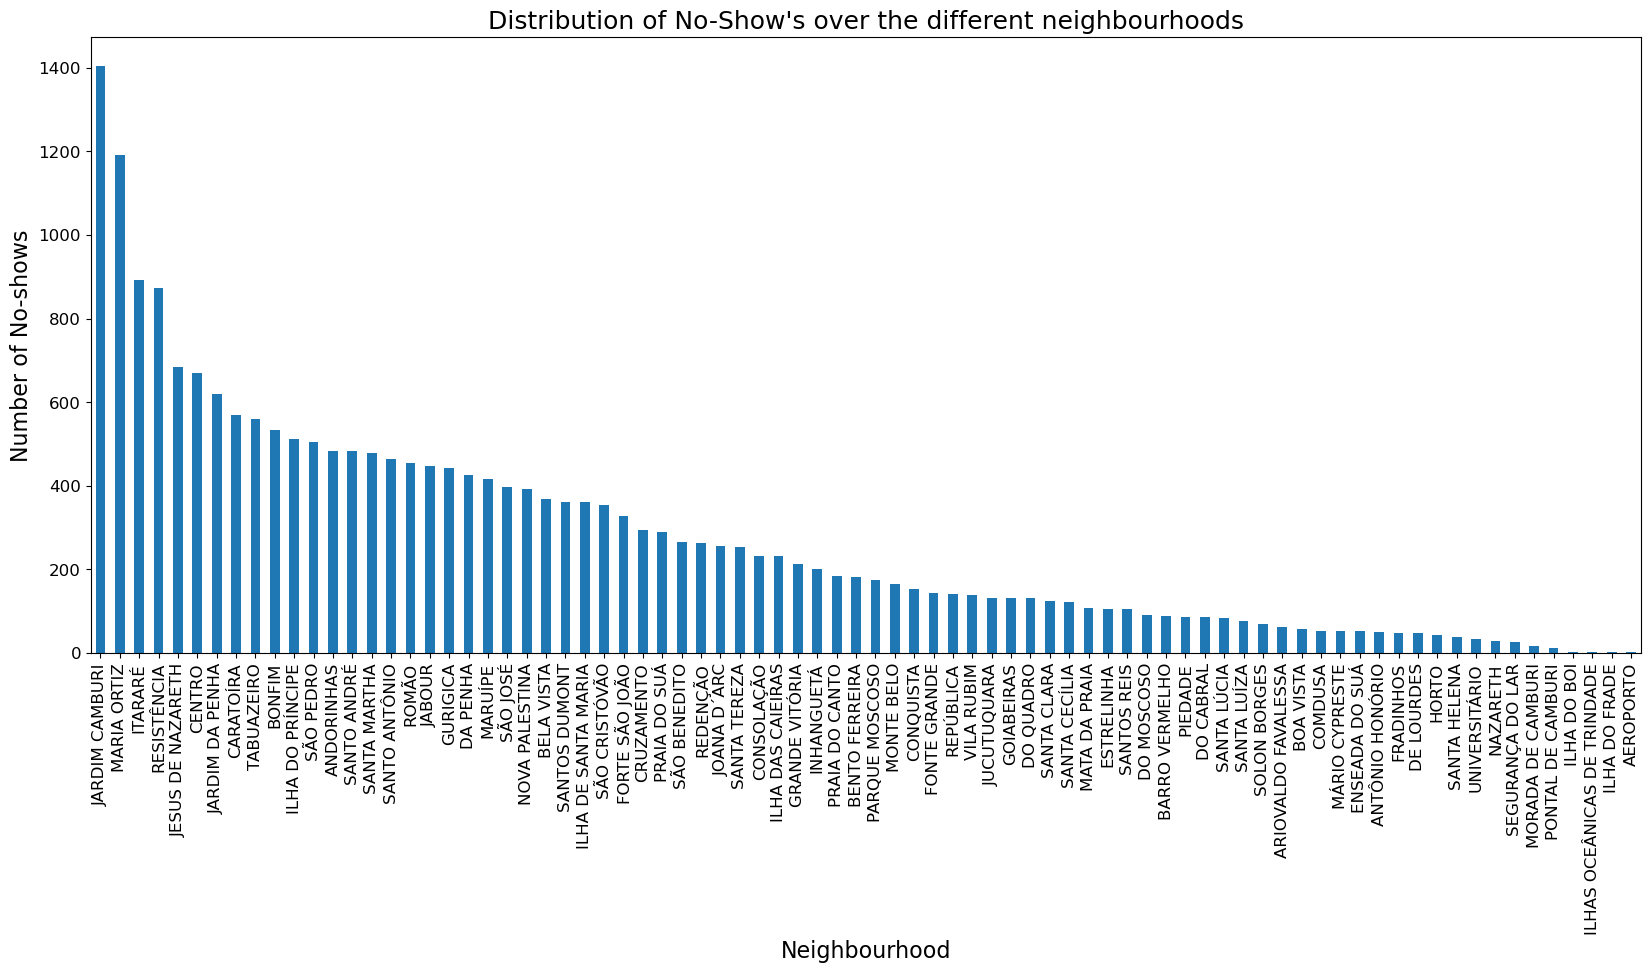

In [23]:
df_NS.neighbourhood.value_counts().plot(kind='bar', figsize=(20, 8));
plt.title("Distribution of No-Show's over the different neighbourhoods", fontsize=18)
plt.xlabel("Neighbourhood", fontsize=16)
plt.ylabel("Number of No-shows", fontsize=16)
plt.xticks(fontsize=12, rotation=90);
plt.yticks(fontsize=12, rotation=0);
#plt.tick_params(axis='both', which='major', labelsize=12)

In [24]:
NS_max_value = df_NS.groupby('neighbourhood').no_show.value_counts().max()
print(NS_max_value)
print(NS_max_value/total_no_shows)

1404
0.06498194945848375


We can see that the neighbourhood that had the most no shows is JARDIM CAMBURI with 1404 no-shows which is 6.50% of all no-shows. 

### Research Question 3 : Which neighbourhood had the highest percentage of no-shows ?

In [25]:
# First we calculate the count of shows and no-shows for every location
appointment_NS_counts = df_NS.groupby('neighbourhood').count().month
appointment_NS_counts

neighbourhood
AEROPORTO                1
ANDORINHAS             484
ANTÔNIO HONÓRIO         49
ARIOVALDO FAVALESSA     61
BARRO VERMELHO          89
                      ... 
SÃO JOSÉ               398
SÃO PEDRO              505
TABUAZEIRO             560
UNIVERSITÁRIO           32
VILA RUBIM             139
Name: month, Length: 80, dtype: int64

In [26]:
# Then we calculate the total appointments per location
appointment_totals = df.groupby('neighbourhood').count().month
appointment_totals

neighbourhood
AEROPORTO                 8
ANDORINHAS             2116
ANTÔNIO HONÓRIO         262
ARIOVALDO FAVALESSA     271
BARRO VERMELHO          399
                       ... 
SÃO JOSÉ               1874
SÃO PEDRO              2371
TABUAZEIRO             3052
UNIVERSITÁRIO           150
VILA RUBIM              832
Name: month, Length: 81, dtype: int64

In [27]:
# Then we calculate the proportions of no-shows (showing only 2 decimal places)
appointment_percent = (appointment_NS_counts/ appointment_totals *100).round(2)
appointment_percent

neighbourhood
AEROPORTO              12.50
ANDORINHAS             22.87
ANTÔNIO HONÓRIO        18.70
ARIOVALDO FAVALESSA    22.51
BARRO VERMELHO         22.31
                       ...  
SÃO JOSÉ               21.24
SÃO PEDRO              21.30
TABUAZEIRO             18.35
UNIVERSITÁRIO          21.33
VILA RUBIM             16.71
Name: month, Length: 81, dtype: float64

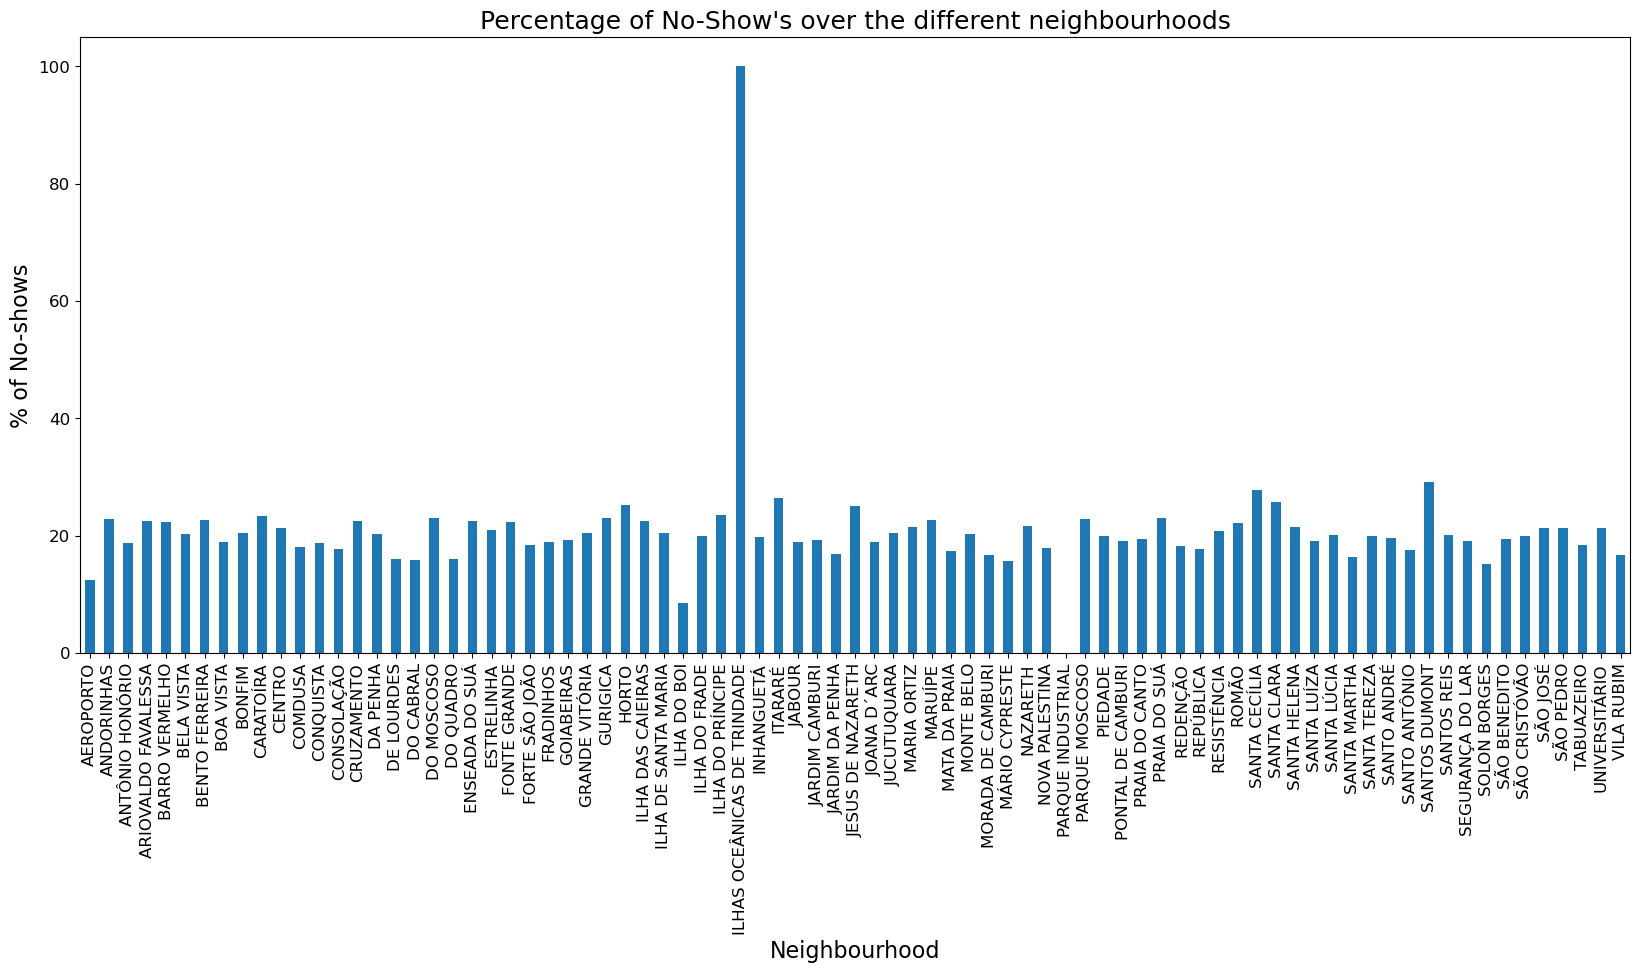

In [28]:
appointment_percent.plot(kind='bar', figsize=(20, 8));
plt.title("Percentage of No-Show's over the different neighbourhoods", fontsize=18)
plt.xlabel("Neighbourhood", fontsize=16)
plt.ylabel("% of No-shows", fontsize=16)
plt.xticks(fontsize=12, rotation=90);
plt.yticks(fontsize=12, rotation=0);
#plt.tick_params(axis='both', which='major', labelsize=12)

At the first look we see that the maximum value is 100% missed appointments but on further investigations is needed as the number may be too small to be indicative

In [29]:
appointment_percent.max()

100.0

In [30]:
A = appointment_percent['ILHAS OCEÂNICAS DE TRINDADE']
B = appointment_totals['ILHAS OCEÂNICAS DE TRINDADE']
print('Neighbourhood with most most no-shows is ILHAS "OCEÂNICAS DE TRINDADE" with {} appointments and % {} No-Shows '.format(B,A))

Neighbourhood with most most no-shows is ILHAS "OCEÂNICAS DE TRINDADE" with 2 appointments and % 100.0 No-Shows 


In [31]:
A = appointment_percent['SANTOS DUMONT']
B = appointment_totals['SANTOS DUMONT']
print('Neighbourhood with the 2nd most most no-shows is ILHAS "SANTOS DUMONT" with {} appointments and % {} No-Shows '.format(B,A))

Neighbourhood with the 2nd most most no-shows is ILHAS "SANTOS DUMONT" with 1243 appointments and % 29.12 No-Shows 


### Research Question 4 : Which Gender had the highest number of no-shows ?

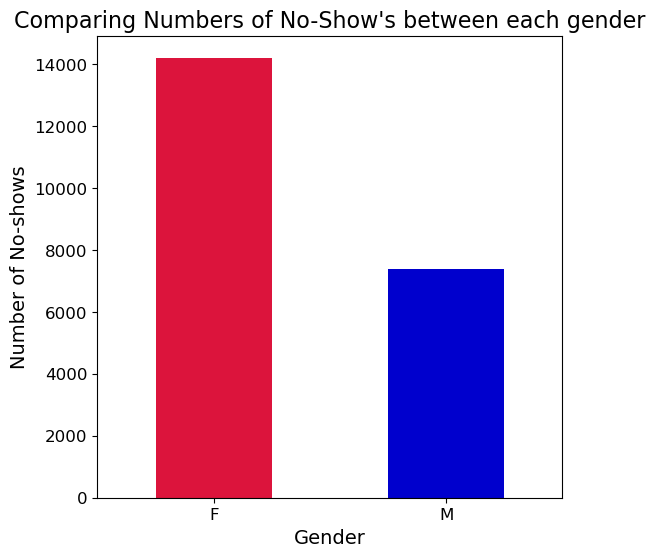

In [32]:
df_NS.gender.value_counts().plot(kind='bar', figsize=(6, 6), color = ['#DC143C','#0000CD']);
plt.title("Comparing Numbers of No-Show's between each gender", fontsize=16)
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Number of No-shows", fontsize=14)
plt.xticks(fontsize=12, rotation=0);
plt.yticks(fontsize=12, rotation=0);

In [33]:
max_NS = df_NS.gender.value_counts().max()
min_NS = df_NS.gender.value_counts().min()
print('Females did not show up to their appointments {} Times while Men did not show-up to {} of their appointments'.format(max_NS,min_NS))

Females did not show up to their appointments 14210 Times while Men did not show-up to 7396 of their appointments


However, this may be the case if women had more appointments, this does not necessarly mean that women tend to skip their appointments more than men.

### Research Question 5 : Which Gender was more probable to not show and skip appointments? 

In [34]:
# First we calculate the count of shows and no-shows for every gender
appointment_NS_counts = df_NS.groupby('gender').count().month
appointment_NS_counts

gender
F    14210
M     7396
Name: month, dtype: int64

In [35]:
# Then we calculate the total appointments per gender
appointment_totals = df.groupby('gender').count().month
appointment_totals

gender
F    68992
M    36379
Name: month, dtype: int64

In [36]:
# Then we calculate the proportions of no-shows (showing only 2 decimal places)
appointment_percent = (appointment_NS_counts/ appointment_totals *100).round(2)
appointment_percent

gender
F    20.60
M    20.33
Name: month, dtype: float64

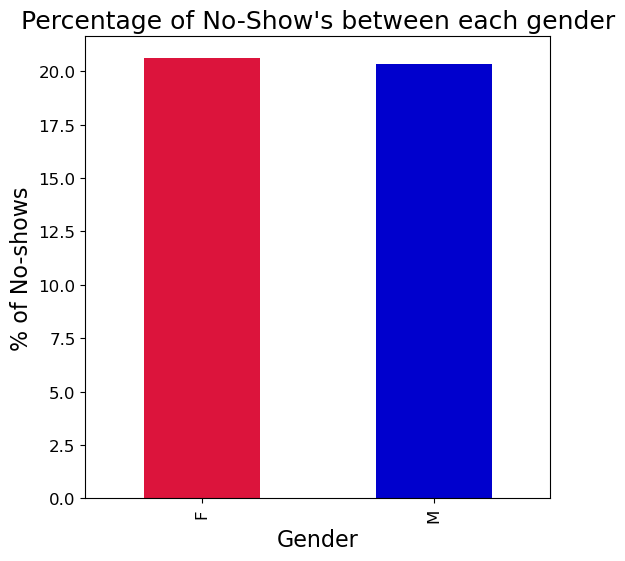

In [37]:
appointment_percent.plot(kind='bar', figsize=(6, 6), color = ['#DC143C','#0000CD']);
plt.title("Percentage of No-Show's between each gender", fontsize=18)
plt.xlabel("Gender", fontsize=16)
plt.ylabel("% of No-shows", fontsize=16)
plt.xticks(fontsize=12, rotation=90);
plt.yticks(fontsize=12, rotation=0);


In [38]:
perc_diff = (appointment_percent[0] - appointment_percent[1]).round(2)
print('The probabilit of women skipping their appointment is = {}% while for men it is = {}%, therefore the difference is = {}%'.format(appointment_percent[0], appointment_percent[1],perc_diff))

The probabilit of women skipping their appointment is = 20.6% while for men it is = 20.33%, therefore the difference is = 0.27%


We can see that the probability women would skip their appointments more than men is very small and negligible = 0.0027 = 0.27%

### Research Question 6: What percent of no shows were enrolled into the healthcare program

In [39]:
# First we calculate the count of shows and no-shows for each subscription type
NS_counts = df_NS.groupby('scholarship').count().month
NS_counts

scholarship
0    19127
1     2479
Name: month, dtype: int64

In [40]:
# Then we calculate the total number of no-shows.
NS_totals = df_NS.shape[0]
NS_totals

21606

In [41]:
# Then we calculate the proportions of no-shows for each subscription (showing only 2 decimal places)
healthcare_percent = (NS_counts/ NS_totals *100).round(2)
healthcare_percent

scholarship
0    88.53
1    11.47
Name: month, dtype: float64

In [42]:
factor = (healthcare_percent[0] / healthcare_percent[1]) .round(2)
factor

7.72

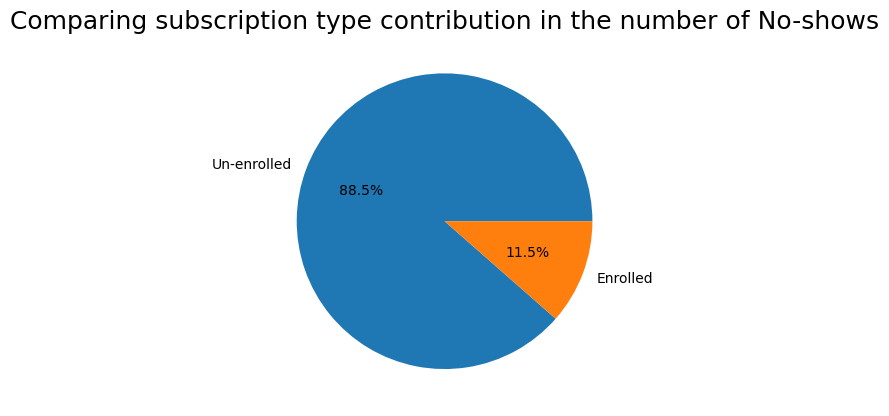

In [43]:
y = [healthcare_percent[0], healthcare_percent[1]]
labels = ['Un-enrolled', 'Enrolled']
plt.pie(y, labels = labels, autopct='%1.1f%%')
plt.title("Comparing subscription type contribution in the number of No-shows", fontsize=18)
plt.show()


We can see that patients who were not enrolled in the brazilian healthcare program were 7.72 times more unlikely to show up to their appointments than those who were enrolled in the healthcare program.

### Research Question 7: What is the effect of SMS reminders on the showing rate ?

In [44]:
# First we calculate the count of shows and no-shows for those who received SMS's and those who did not
no_show_sms = df_NS.groupby(['sms_received']).count().month
no_show_sms

sms_received
0    11840
1     9766
Name: month, dtype: int64

In [45]:
show_sms = df_S.groupby(['sms_received']).count().month
show_sms

sms_received
0    58118
1    25647
Name: month, dtype: int64

Then we calculate the probabilities 

In [46]:
no_show_sms_p = no_show_sms / (df_NS.shape[0])
no_show_sms_p

sms_received
0    0.547996
1    0.452004
Name: month, dtype: float64

In [47]:
show_sms_p = show_sms / (df_S.shape[0])
show_sms_p 

sms_received
0    0.693822
1    0.306178
Name: month, dtype: float64

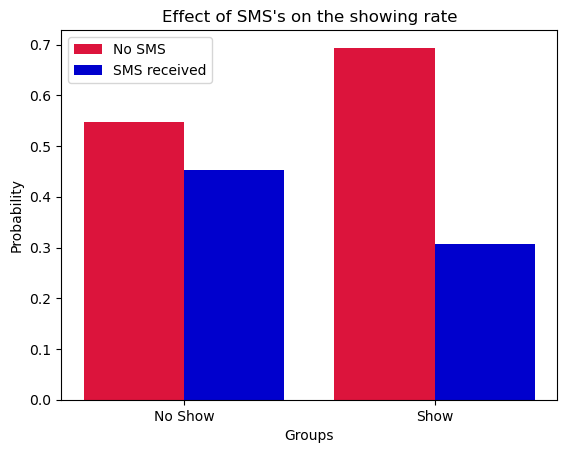

In [48]:
X = ['No Show','Show']
Y1 = [no_show_sms_p[0], show_sms_p[0]]
Y2 = [no_show_sms_p[1], show_sms_p[1]]

  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.20 , Y1, 0.4, label = 'No SMS',color = ['#DC143C','#DC143C'] )
plt.bar(X_axis + 0.20 , Y2, 0.4, label = 'SMS received', color = ['#0000CD', '#0000CD'])
  
plt.xticks(X_axis, X)
plt.xlabel("Groups")
plt.ylabel('Probability')
plt.title("Effect of SMS's on the showing rate")
plt.legend()
plt.show()

The findings are very odd as we see that:

<br>1- for those who showed to their appointments
- 70% did not receive sms reminders
- 30% received sms reminders

<br> we would expect the opposite to happen

<br>2- for those who did not show
- 55% did not receive sms reminder
- 45% received sms reminders

<br>which is more logical but the difference is not indicative enough for us to determine the effectiveness of SMS reminders

<br> This would make us question the effect of the sms reminders on the showing rate


<a id='conclusions'></a>
## Conclusions

### The Dataset
The dataset used was complete to begin with.
<br> It didnt require much cleaning as there was only one wrong entry and no missing values
<br> There were some duplicate entries which we removed
<br> therefore, in the cleaning process included removing that wrong entry, removing duplicates, and removing a few unnecessary columns and then creating a new one for the month data.

### The Analysis

<br>1 - For the given annual quarter for the months of April, May, and June We found that June was the month with the most number of no-shows 16203 from the total 21606 no-shows total in our dataframe which is 75% of all no-shows and that the plot is right-skewed.

<br>2 - As for the neighbourhood with the heighest number of no-shows it is JARDIM CAMBURI with 1404 no-shows from the total 21606 no-shows in our dataset which is 6.50% of all the no-shows.

<br>3 - As for the neighbourhood with the highest percentage of no-shows  is ILHAS "OCEÂNICAS DE TRINDADE" with % 100.0 No-Shows
- However, that maximum value is too small to be indicative so we investigated further to find the 2nd heighest neighbourhood regarding the percentage of no-shows which is ILHAS "SANTOS DUMONT" that has a % 29.12 of No-Shows and 1243 appointments.

<br>4 - As for the comparison between genders, Females did not show up to their appointments 14210 Times while Men did not show-up to 7396 of their appointments
- However, this may be due to women having more appointments, this does not necessarly mean that women tend to skip their appointments more than men.

<br>5 - Continuing on the comparison between genders, We can see that the probability of women skipping their appointments is = 20.60 % while the probability of men skipping their appointments is = 200..%, and therefore the probability women would skip their appointments more than men is very small and negligible = 0.27% 


<br> 6 - moving on We can see that only 11.50% of the patients who skipped their appointments were enrolled in the healthcare program with the remaining 85.50% who skipped their appointments wer not enrolled.
- This means that patients who were not enrolled in the brazilian healthcare program were 7.72 times more unlikely to show up to their appointments than those who were enrolled in the healthcare program.

<br> 7 - Last, When studying the effect of SMS reminders on the showing rate we got results different from what we initially expected, we found out that:
- for the people who showed to their appointments only 30% of them received SMS reminders.
- while for the people who did not show, about 45% of them received SMS reminders.

<br>which is more logical but the difference is not indicative enough to know the effectiveness of the SMS reminders .


### Limitations
<br> One of the main limitations of the analysis was not knowing how many hospitals did each location contain, therefore parts of the analysis were performed in regards to the location which is not very meaningful if we want to know the exact performance of each hospital and the number of people who visit it, both would lead us to more accurately evaluate the quality of the hospitals and the areas as well.